In [1]:
import json
import pandas as pd
import numpy as np

data_pd = pd.read_csv(r'C:\Users\Fernando\ProcesadoMasivoDatos\Proyecto\suj-8\StreamingHistory_suj8.csv', encoding="utf8")

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

1708

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0       Recycled J            217
1       C. Tangana            156
2  La Vida Moderna            147
3             Bejo            109
4           Kase.O            107
5     Natos y Waor            100
6             SFDK             77
7      Ayax y Prok             77
8           Foyone             76
9        Yung Beef             72

<AxesSubplot:ylabel='Artist'>

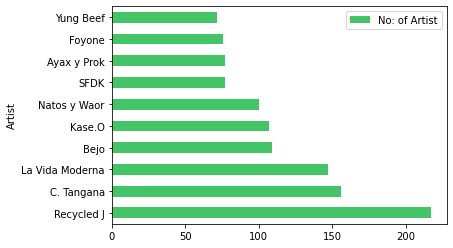

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')


In [5]:
df1_list = df1['Artist'].head(10).tolist()


In [6]:
print(df1_list)

['Recycled J', 'C. Tangana', 'La Vida Moderna', 'Bejo', 'Kase.O', 'Natos y Waor', 'SFDK', 'Ayax y Prok', 'Foyone', 'Yung Beef']


In [7]:
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['El Tiempo Es Oro', 'Patito Feo (Skit)', 'Fake ID', 'C.H.I.T.O - C. Tangana', 'La Vida Moderna | A PONERSE LA MASCARILLA', 'La Vida Moderna | A PONERSE LA MASCARILLA', 'La Vida Moderna | A PONERSE LA MASCARILLA', 'Nunca Estoy', 'Como habla una mujer (feat. C. Tangana)', 'Como habla una mujer (feat. C. Tangana)', 'La Vida Moderna | Programa científico', 'La Vida Moderna | Hace calor', 'La Vida Moderna | A PONERSE LA MASCARILLA', 'La Vida Moderna | Programa científico', 'La Vida Moderna | El confort', 'La Vida Moderna | Programa científico', 'La Vida Moderna | Hace calor', 'Ring-A-Ding-Ding', 'La Vida Moderna | Hay una carta para ti', 'Ring-A-Ding-Ding', "When You're Smiling (The Whole World Smiles With You) - 1998 Digital Remaster", 'No Te Imaginas', 'Maybe', 'No Te Imaginas', 'Un Verano En Mallorca', 'La Vida Moderna | El debut del heredero', 'Romero el Madero', 'Fake ID', 'Nunca Estoy', 'Como habla una mujer (feat. C. Tangana)', 'No Te Debí Besar', 'Booty', 'Viene y Va', 'Llorando en

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'

scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['1i6rdqcJVC6ziT6OdN64bn', '5OiqDG5Yj00PXCepHvlshH', '4qq73N1TKocRaYGQS23b9u', None, None, None, None, '6N4ioa3XSbvjmwdVEERl8F', '1pJeLDLduCZS4hLuc1JByJ', '1pJeLDLduCZS4hLuc1JByJ', None, None, None, None, None, None, None, '3mYKVGjd2OYEOdL3j8PZ5Q', None, '3mYKVGjd2OYEOdL3j8PZ5Q', '4v79iygQ4tRn5GDwxDEN45', '1uam9jorwMmFEeCM9CMsc9', '6SXy02aTZU3ysoGUixYCz0', '1uam9jorwMmFEeCM9CMsc9', '15tpxASJbTcAAfezvJfvuj', None, '3zJex4MhUlldtnWBXYvxIS', '4qq73N1TKocRaYGQS23b9u', '6N4ioa3XSbvjmwdVEERl8F', '1pJeLDLduCZS4hLuc1JByJ', '1KdwnsWOvhM53vezy5ROuf', '4W3FJapn5CD6Fnrlfj4HFe', '1UozIJsPRJVXDRG08AgUQP', '3YURfhPPT7GipmI7pIj0m3', '3joo84oco9CD4dBsKNWRRW', '2vEY3cNwXYxIG4fPAoN14q', '4wNxcizGKSTfKm1emmO4yk', '7jx4MkfAR6y1lGAqhqJtlP', '6puxHBNwu2Nmm7uD3Rd2MP', '64NRP5zPfcCZJw8Lc61Wgi', '67MKAghHYxyqjXVGDseEE8', '0k4RVdTt7e9nfUUh4CWva7', '5i14UelbXeAYXJPcjLEyad', '23tHO8hOEVUIZU1y7h3gup', '0HiJEuDomdo3NMQ9Zi0IHT', '7HsFyjB4IDsrZ1UrNUhRZM', '29ftcpA5Dq7cuzMHiIzrzh', '5OiqDG5Yj00PXCepHvlshH', '5mOzAyeeR8

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

3614


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████████████████████████████████████████████████████████████████████████| 3614/3614 [08:03<00:00,  7.48it/s]


In [24]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [25]:
TrackIDs_StillNotParsed [:10]

[]

In [26]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [27]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  1i6rdqcJVC6ziT6OdN64bn   0.551     0.377  104.997       0.0282   
1  5OiqDG5Yj00PXCepHvlshH   0.620     0.528  180.611       0.3700   
2  4qq73N1TKocRaYGQS23b9u   0.862     0.225  122.011       0.0776   
3  6N4ioa3XSbvjmwdVEERl8F   0.369     0.309  135.019       0.1200   
4  1pJeLDLduCZS4hLuc1JByJ   0.766     0.208  179.945       0.1560   

   acousticness  instrumentalness  time_signature  danceability   key  \
0         0.219          0.000048             4.0         0.684  11.0   
1         0.178          0.000000             4.0         0.642   5.0   
2         0.210          0.036300             4.0         0.746   8.0   
3         0.476          0.006090             4.0         0.913   2.0   
4         0.389          0.000029             4.0         0.667  11.0   

   duration_ms  loudness  valence  mode                             track_uri  
0     241246.0    -7.311    0.594   0.0  spotify:track:1i6rdqcJVC6ziT6OdN64bn  
1     100477.0    -7.048    0.888   0.0  spotify:track:5OiqDG5Yj00PXCepHvlshH  
2     246970.0    -6.110    0.604   1.0  spotify:track:4qq73N1TKocRaYGQS23b9u  
3     162493.0    -5.299    0.436   1.0  spotify:track:6N4ioa3XSbvjmwdVEERl8F  
4     206890.0    -4.907    0.496   0.0  spotify:track:1pJeLDLduCZS4hLuc1JByJ

In [28]:
audioFeaturesDF_AllTracks.shape

(3614, 15)

In [29]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks_suj6.csv")

In [30]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks_suj6.csv").drop(["Unnamed: 0"], axis = 1)

In [31]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   1i6rdqcJVC6ziT6OdN64bn   0.551    0.3770  104.997       0.0282   
1   5OiqDG5Yj00PXCepHvlshH   0.620    0.5280  180.611       0.3700   
2   4qq73N1TKocRaYGQS23b9u   0.862    0.2250  122.011       0.0776   
3   6N4ioa3XSbvjmwdVEERl8F   0.369    0.3090  135.019       0.1200   
4   1pJeLDLduCZS4hLuc1JByJ   0.766    0.2080  179.945       0.1560   
5   1pJeLDLduCZS4hLuc1JByJ   0.766    0.2080  179.945       0.1560   
6   3mYKVGjd2OYEOdL3j8PZ5Q   0.321    0.2960  159.226       0.0938   
7   3mYKVGjd2OYEOdL3j8PZ5Q   0.321    0.2960  159.226       0.0938   
8   4v79iygQ4tRn5GDwxDEN45   0.329    0.2900   79.054       0.0475   
9   1uam9jorwMmFEeCM9CMsc9   0.593    0.0625  100.033       0.1570   
10  6SXy02aTZU3ysoGUixYCz0   0.653    0.3340   80.897       0.0361   
11  1uam9jorwMmFEeCM9CMsc9   0.593    0.0625  100.033       0.1570   
12  15tpxASJbTcAAfezvJfvuj   0.623    0.1450   98.104       0.2290   
13  3zJex4MhUlldtnWBXYvxIS   0.912    0.2570  142.150       0.0368   
14  4qq73N1TKocRaYGQS23b9u   0.862    0.2250  122.011       0.0776   
15  6N4ioa3XSbvjmwdVEERl8F   0.369    0.3090  135.019       0.1200   
16  1pJeLDLduCZS4hLuc1JByJ   0.766    0.2080  179.945       0.1560   
17  1KdwnsWOvhM53vezy5ROuf   0.684    0.1830   75.233       0.3160   
18  4W3FJapn5CD6Fnrlfj4HFe   0.771    0.0901  102.928       0.0805   
19  1UozIJsPRJVXDRG08AgUQP   0.719    0.0660   99.011       0.0485   

    acousticness  instrumentalness  time_signature  danceability   key  \
0         0.2190          0.000048             4.0         0.684  11.0   
1         0.1780          0.000000             4.0         0.642   5.0   
2         0.2100          0.036300             4.0         0.746   8.0   
3         0.4760          0.006090             4.0         0.913   2.0   
4         0.3890          0.000029             4.0         0.667  11.0   
5         0.3890          0.000029             4.0         0.667  11.0   
6         0.6140          0.000000             4.0         0.576  10.0   
7         0.6140          0.000000             4.0         0.576  10.0   
8         0.4360          0.000000             4.0         0.565  10.0   
9         0.3780          0.000011             4.0         0.871  11.0   
10        0.2170          0.000458             4.0         0.495   7.0   
11        0.3780          0.000011             4.0         0.871  11.0   
12        0.1390          0.000005             4.0         0.874   7.0   
13        0.0602          0.000175             4.0         0.550   2.0   
14        0.2100          0.036300             4.0         0.746   8.0   
15        0.4760          0.006090             4.0         0.913   2.0   
16        0.3890          0.000029             4.0         0.667  11.0   
17        0.1250          0.026100             3.0         0.672   9.0   
18        0.0167          0.000002             4.0         0.825   1.0   
19        0.2690          0.000078             4.0         0.808   7.0   

    duration_ms  loudness  valence  mode                             track_uri  
0      241246.0    -7.311    0.594   0.0  spotify:track:1i6rdqcJVC6ziT6OdN64bn  
1      100477.0    -7.048    0.888   0.0  spotify:track:5OiqDG5Yj00PXCepHvlshH  
2      246970.0    -6.110    0.604   1.0  spotify:track:4qq73N1TKocRaYGQS23b9u  
3      162493.0    -5.299    0.436   1.0  spotify:track:6N4ioa3XSbvjmwdVEERl8F  
4      206890.0    -4.907    0.496   0.0  spotify:track:1pJeLDLduCZS4hLuc1JByJ  
5      206890.0    -4.907    0.496   0.0  spotify:track:1pJeLDLduCZS4hLuc1JByJ  
6      164320.0   -11.602    0.664   1.0  spotify:track:3mYKVGjd2OYEOdL3j8PZ5Q  
7      164320.0   -11.602    0.664   1.0  spotify:track:3mYKVGjd2OYEOdL3j8PZ5Q  
8      120333.0   -12.222    0.702   0.0  spotify:track:4v79iygQ4tRn5GDwxDEN45  
9      167190.0    -6.015    0.823   0.0  spotify:track:1uam9jorwMmFEeCM9CMsc9  
10     272947.0    -6.769    0.571   0.0  spotify:track:6SXy02aTZU3ysoGUixYCz0  
11     167190.0    -